# Calculations

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import sys
import os

nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
    
from Utils.code_utils import save_obj
import Utils.evaluation_measures as ev
from collections import Counter

In [2]:
# Define Data Directory
data_directory_in_str = '/mnt/c/Users/Yassin/Desktop/Code/Backbones Survey 2022/Backbone Results/All/'


# Loop through the Networks
for file in os.listdir(os.fsencode(data_directory_in_str)):
    network = os.fsdecode(file)
    if network.endswith(".csv"): 
        print("starting with " + network)   

        # Read the Graph with the p-values
        edge_list = pd.read_csv(data_directory_in_str  + '/' + network)
        G = nx.from_pandas_edgelist(edge_list, edge_attr=['mlf_score', 'weight', 'lans_alpha', 'df_alpha', 'ecm_alpha', 'nc_alpha', 'gloss_alpha', 'pf_alpha'])
        
        
        # Define Backbones to Evaluate
        backbones = ['mlf_score', 'weight', 'lans_alpha', 'df_alpha', 'ecm_alpha', 'nc_alpha', 'gloss_alpha', 'pf_alpha']

        # Define Edge Percentage to be Removed
        edge_percentage = np.array(list(range(0, 100, 2)))/100
        
        
        # Define Results DataFrame for each network
        backbone_lcc_results = pd.DataFrame(index=edge_percentage, columns=backbones)

        backbone_susceptibility_results = pd.DataFrame(index=edge_percentage, columns=backbones)
        
        # Loop through the backbones 
        for backbone in backbones:
            print('Backbone: ' + backbone)
            # if (backbone == 'gloss_alpha') & (edge_list[backbone][0] ==0):
            if (edge_list[backbone] == 0).all()  and (edge_list[backbone] == 709.782712893384).all():
                
                backbone_lcc_results[backbone] = 0
                backbone_lcc_results.index.name = 'percentage'

                backbone_susceptibility_results[backbone] = 0
                backbone_susceptibility_results.index.name = 'percentage'
                
            else:
                edge_list = edge_list.sort_values([backbone, 'weight'], ascending=[True if 'alpha' in backbone else False, False])

                # Define Temporal Results Array 
                lcc_res = []
                susceptibility_res = []

                # Compute the infection index for each node after removing x percentage from the original graph
                for percentage in edge_percentage:
                    g = nx.from_pandas_edgelist(edge_list[int(percentage*edge_list.shape[0]):])
                    g.add_nodes_from(G.nodes())
                    lcc_res.append(ev.get_lcc_size(g)/len(G))

                    susceptibility_index = 0
                    values = ev.get_connected_components_sizes(g)
                    values.sort(reverse=True)
                    lcc_sizes_and_counts = Counter(values[1:]) 
                    for comp_size in lcc_sizes_and_counts:
                        susceptibility_index += lcc_sizes_and_counts[comp_size]*(comp_size**2)
                    susceptibility_index /= len(G)
                    susceptibility_res.append(susceptibility_index)

                backbone_lcc_results[backbone] = lcc_res
                backbone_lcc_results.index.name = 'percentage'

                backbone_susceptibility_results[backbone] = susceptibility_res
                backbone_susceptibility_results.index.name = 'percentage'

        # break

        save_obj(backbone_lcc_results, '/mnt/c/Users/Yassin/Desktop/Code/Backbones Survey 2022/Percolation Results/',  'LCC' + '-' + network.split('.')[0])
        save_obj(backbone_susceptibility_results, '/mnt/c/Users/Yassin/Desktop/Code/Backbones Survey 2022/Percolation Results/',  'Susceptibility'+ '-' + network.split('.')[0])
            
            
        

starting with aagregated_subjects.csv
Backbone: mlf_score
Backbone: weight
Backbone: lans_alpha
Backbone: df_alpha
Backbone: ecm_alpha
Backbone: nc_alpha
Backbone: gloss_alpha
Backbone: pf_alpha
starting with academia.csv
Backbone: mlf_score
Backbone: weight
Backbone: lans_alpha
Backbone: df_alpha
Backbone: ecm_alpha
Backbone: nc_alpha
Backbone: gloss_alpha
Backbone: pf_alpha
starting with airports.csv
Backbone: mlf_score
Backbone: weight
Backbone: lans_alpha
Backbone: df_alpha
Backbone: ecm_alpha
Backbone: nc_alpha
Backbone: gloss_alpha
Backbone: pf_alpha
starting with all_1m.csv
Backbone: mlf_score
Backbone: weight
Backbone: lans_alpha
Backbone: df_alpha
Backbone: ecm_alpha
Backbone: nc_alpha
Backbone: gloss_alpha
Backbone: pf_alpha
starting with facebook-like-forum.csv
Backbone: mlf_score
Backbone: weight
Backbone: lans_alpha
Backbone: df_alpha
Backbone: ecm_alpha
Backbone: nc_alpha
Backbone: gloss_alpha
Backbone: pf_alpha
starting with foodweb_baywet.csv
Backbone: mlf_score
Backbon

# Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import trapz
import seaborn as sns
import networkx as nx
import pandas as pd
import numpy as np
import sys
import os

nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
    
from Utils.code_utils import load_obj


In [ ]:
labels={'original':'Original Network', 'gloss_alpha':'GLOSS Filter', 'nc_alpha':'Noise Corrected Filter', 'mlf_score':'Marginal Likelihood Filter', 'pf_alpha':'Polya Urn Filter', 'df_alpha':'Disparity Filter', 'hss_score':'High Salience Skeleton', 'global_score':'Global Threshold', 'lans_alpha':'LANS Filter', 'ecm_alpha':'ECM Filter', 'weight':'Global Threshold'}
labels={'original':'Original Network', 'gloss_alpha':'GloSS', 'nc_alpha':'NC', 'mlf_score':'MLF', 'pf_alpha':'PF', 'df_alpha':'DF', 'hss_score':'High Salience Skeleton', 'global_score':'Global Threshold', 'lans_alpha':'LANS', 'ecm_alpha':'ECM'}#, 'weight':'W'}

colors = {'original':'#000000', 'mlf_score':'#4c72b0', 'weight':'#dd8452', 'lans_alpha':'#55a868', 'df_alpha':'#c44e52', 'ecm_alpha':'#8172b3', 'nc_alpha':'#937860', 'gloss_alpha':'#da8bc3', 'pf_alpha':'#8c8c8c'}#, '#ccb974', '#64b5cd'}backbones = ['mlf_score', 'df_alpha', 'lans_alpha', 'gloss_alpha', 'ecm_alpha', 'pf_alpha', 'nc_alpha']
backbones = ['mlf_score', 'df_alpha', 'lans_alpha', 'gloss_alpha', 'ecm_alpha', 'pf_alpha', 'nc_alpha']#, 'weight']
network_names = {'aagregated_subjects': 'Human Connectome','academia': 'Faculty Hiring US','airports': 'Worldwide Air Transportation','all_1m': 'Budapest Connectome 3','facebook-like-forum': 'Facebook Like Forum','foodweb_baywet': 'Florida Bay','game_thrones': 'Game of Thrones','gene interactions': 'Gene Interactions','hermaphrodite_gap_junction': 'C. elegans','highschool': 'Illinois High School','job_mobility_network_09_10': 'Job Mobility','karate_club': 'Karate Club','lesmis': 'Les Misérables','meetup-comembership': 'Meetup Dublin','messal_shale': 'Messel Shale','openflights': 'Openflights','paris_bus': 'Paris Bus','paris_rail': 'Paris Rail','residence_hall': 'ANU Residence Hall','salanthe-high-school': 'US-HS','shipping-2015': 'GLSN 2015','sociopatterns-conference': 'It-SC','sociopatterns-high-school': 'Fr-HS','sociopatterns-hospital': 'Fr-Ho','sociopatterns-primary-school': 'Fr-PS','sociopatterns-workplace': 'Fr-Wo','southern_club_women': 'Southern Women Club','sports_cotagging': 'Sports Cotagging','toth-elementary-school': 'US-ES','toth-middle-school': 'US-MS','train_terrorists': 'Madrid Train Bombing','us-airports-500': 'US Airports 500','webkb_cornell_cocite': 'Webkb Cornell','webkb_washington_cocite': 'Webkb Washington','windsurfers': 'Windsurfers','youtube-2': 'Youtube-SF','youtube-3': 'Youtube-SSP','youtube-4': 'Youtube-SSB','youtube-5': 'Youtube-SFV'}
backbones = backbones[::-1]

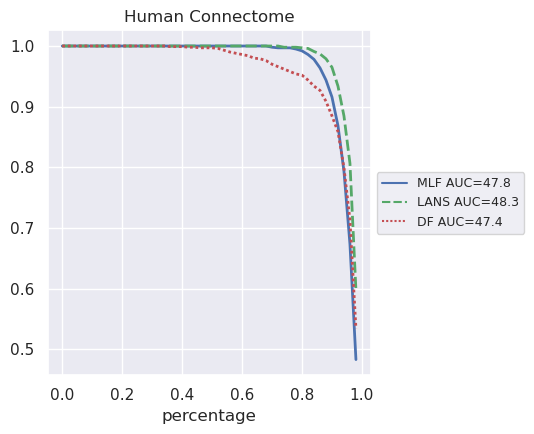

In [ ]:
# Define Data Directory
data_directory_in_str = '/mnt/c/Users/Yassin/Desktop/Code/Backbones Survey 2022/Backbone Results/All/'


# Loop through the Networks
for file in os.listdir(os.fsencode(data_directory_in_str)):
    network = os.fsdecode(file)
    if network.endswith(".csv"):

        backbone_lcc_results = load_obj('/mnt/c/Users/Yassin/Desktop/Code/Backbones Survey 2022/Percolation Results/', 'LCC-'+ network.split('.')[0])

        #if backbone_lcc_results['gloss_alpha'][0.00] == 0:
        for backbone in backbones:
            if ((backbone_lcc_results[backbone] == 0).all()):
                backbone_lcc_results = backbone_lcc_results.drop(columns=[backbone])
        backbone_lcc_results = backbone_lcc_results.drop(columns=['weight'])
        #break
        sns.set_theme(style="darkgrid")
        fig, ax = plt.subplots(1, 1, figsize=(5.5,4.5))
        sns.set_palette([colors[name] for name in backbone_lcc_results.columns])

        backbone_lcc_results.columns = [labels[label] + ' AUC=' + str(round(trapz(backbone_lcc_results[label]), 1)) for label in backbone_lcc_results.columns if label !='weight']



        g = sns.lineplot(data=backbone_lcc_results, ax = ax, linewidth =2)

        ax.get_legend().remove()

        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=9)

        ax.set_title(network_names[network.split('.csv')[0]])

        plt.tight_layout()
        # fig.savefig('/mnt/c/Users/Yassin/Desktop/Code/Backbones Survey 2022/Figures/Percolation Results/Networks/' + network.split('.')[0] + '.png', dpi=300)
        # fig.savefig('/mnt/c/Users/Yassin/Desktop/Code/Backbones Survey 2022/Figures/Percolation Results/Networks/' + network.split('.')[0] + '.eps', dpi=300)
        # plt.close()
        break



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


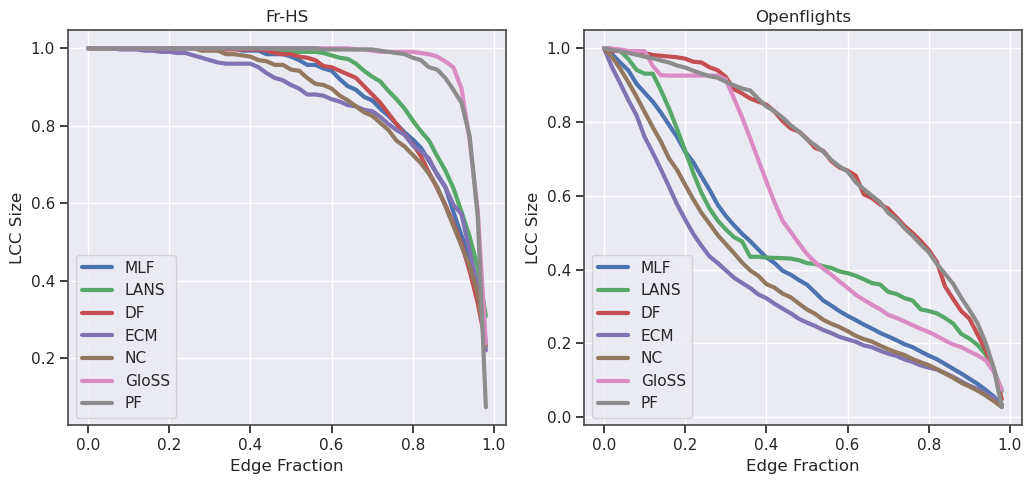

In [ ]:
sns.set(font_scale = 1)

sns.set_style('darkgrid')
fig, axs = plt.subplots(1, 2, figsize=(10.5,5))

data_directory_in_str = '/mnt/c/Users/Yassin/Desktop/Code/Backbones Survey 2022/Backbone Results/All/'


#############################################################################################################################
      
network = 'sociopatterns-high-school.csv'

axs[0].tick_params(axis='x', which="both", bottom=True)
axs[0].tick_params(axis='y', which="both", left=True)



backbone_lcc_results = load_obj('/mnt/c/Users/Yassin/Desktop/Code/Backbones Survey 2022/Percolation Results/', 'LCC-'+ network.split('.')[0])

#if backbone_lcc_results['gloss_alpha'][0.00] == 0:
for backbone in backbones:
    if ((backbone_lcc_results[backbone] == 0).all()):
        backbone_lcc_results = backbone_lcc_results.drop(columns=[backbone])
        
backbone_lcc_results = backbone_lcc_results.drop(columns=['weight'])
sns.set_palette([colors[name] for name in backbone_lcc_results.columns])
backbone_lcc_results.columns = [labels[label] for label in backbone_lcc_results.columns if label !='weight']
g = sns.lineplot(data=backbone_lcc_results, ax = axs[0], linewidth =3, linestyle='--')



            
            

axs[0].spines['bottom'].set_color('0.3')
axs[0].spines['top'].set_color('0.3')
axs[0].spines['right'].set_color('0.3')
axs[0].spines['left'].set_color('0.3')


axs[0].set_xlabel('Edge Fraction')#, fontsize=12)
axs[0].set_ylabel('LCC Size')#, fontsize=12)
axs[0].set_title(network_names[network.split('.')[0]])    

        
        
leg1 = axs[0].legend()

############################################################################################################################# 
network = 'openflights.csv'


axs[1].tick_params(axis='x', which="both", bottom=True)
axs[1].tick_params(axis='y', which="both", left=True)



backbone_lcc_results = load_obj('/mnt/c/Users/Yassin/Desktop/Code/Backbones Survey 2022/Percolation Results/', 'LCC-'+ network.split('.')[0])

#if backbone_lcc_results['gloss_alpha'][0.00] == 0:
for backbone in backbones:
    if ((backbone_lcc_results[backbone] == 0).all()):
        backbone_lcc_results = backbone_lcc_results.drop(columns=[backbone])
        
backbone_lcc_results = backbone_lcc_results.drop(columns=['weight'])
sns.set_palette([colors[name] for name in backbone_lcc_results.columns])
backbone_lcc_results.columns = [labels[label] for label in backbone_lcc_results.columns if label !='weight']
g = sns.lineplot(data=backbone_lcc_results, ax = axs[1], linewidth =3, linestyle='--')



            
            

axs[1].spines['bottom'].set_color('0.3')
axs[1].spines['top'].set_color('0.3')
axs[1].spines['right'].set_color('0.3')
axs[1].spines['left'].set_color('0.3')


axs[1].set_xlabel('Edge Fraction')#, fontsize=12)
axs[1].set_ylabel('LCC Size')#, fontsize=12)
axs[1].set_title(network_names[network.split('.')[0]])    

        
        
# axs[1].legend()
leg2 = axs[1].legend(bbox_to_anchor=(0, 0), loc="lower left")
#############################################################################################################################

for ax in axs:
    for line in ax.lines:
        line.set_linestyle("-")

for leg in [leg1, leg2]:
    for legobj in leg.legendHandles:
        legobj.set_linestyle('-')
        legobj.set_linewidth(3)
figures_path = '/mnt/c/Users/Yassin/Desktop/Code/Backbones Survey 2022/Figures/Percolation Results/'

plt.tight_layout()
fig.savefig(figures_path + 'Percolation-behaviors.png', dpi=300)
fig.savefig(figures_path + 'Percolation-behaviors.eps', dpi=300)
# plt.close()
    

## Plotting Boxplot of ranks w.r.t average AUC across all netowrks

In [ ]:

# Define Data Directory
data_directory_in_str = '/mnt/c/Users/Yassin/Desktop/Code/Backbones Survey 2022/Backbone Results/All/'

area_df = pd.DataFrame(index=backbones, columns=[os.fsdecode(file) for file in os.listdir(os.fsencode(data_directory_in_str)) if 'csv' in os.fsdecode(file)])

# Loop through the Networks
for file in os.listdir(os.fsencode(data_directory_in_str)):
    network = os.fsdecode(file)
    if network.endswith(".csv"):

        backbone_lcc_results = load_obj('/mnt/c/Users/Yassin/Desktop/Code/Backbones Survey 2022/Percolation Results/', 'LCC-' + network.split('.')[0])
        # if backbone_lcc_results['gloss_alpha'][0.00] == 0:
        #     backbone_lcc_results = backbone_lcc_results.drop(columns=['gloss_alpha'])
        for backbone in backbones:
            if ((backbone_lcc_results[backbone] == 0).all()):
                backbone_lcc_results = backbone_lcc_results.drop(columns=[backbone])
                
        backbone_lcc_results = backbone_lcc_results.drop(columns=['weight'])

        #backbone_lcc_results.columns = [labels[label] for label in backbone_lcc_results.columns]

        df = pd.DataFrame(index=[network])
        for col in backbone_lcc_results.columns:
            # Compute the area using the composite trapezoidal rule.
            df[col] = trapz(backbone_lcc_results[col])#, dx=0.02)
        area_df[network] = df.T[network]


In [ ]:
ranks_auc = pd.DataFrame(index=area_df.index, columns=area_df.columns)
for col in area_df.columns:
    area_df = area_df.sort_values(by=col)
    ranks_auc[col] = area_df[col].rank()

In [ ]:
ranks_auc_T = ranks_auc.T
ranks_auc = ranks_auc_T[['nc_alpha', 'ecm_alpha', 'mlf_score', 'lans_alpha', 'df_alpha', 'pf_alpha', 'gloss_alpha']]

/home/yassin/anaconda3/envs/backbones-env/lib/python3.10/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


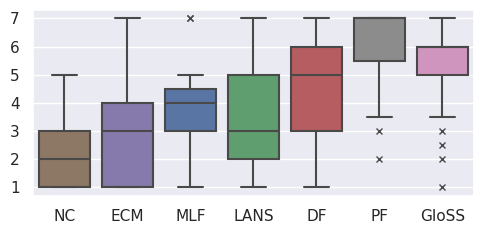

In [ ]:
sns.set(font_scale = 0.5)

plt.figure(figsize=(5,2.5))

sns.set_theme(style="darkgrid")
sns.set_palette([colors[name] for name in ranks_auc.columns])

g = sns.boxplot(data=ranks_auc, meanline=True, flierprops={"marker": "x"})

g.set_xticklabels([labels[label] for label in ranks_auc.columns])#, rotation=90)
g.set_yticks([1, 2, 3, 4, 5, 6, 7])

# plt.title('Bckbones Ranks W.r.t average AUC across 10 netowrks')
plt.tight_layout()
plt.savefig('/mnt/c/Users/Yassin/Desktop/Code/Backbones Survey 2022/Figures/Percolation Results/boxplot.png', bbox_inches='tight', dpi=300)
plt.savefig('/mnt/c/Users/Yassin/Desktop/Code/Backbones Survey 2022/Figures/Percolation Results/boxplot.eps', bbox_inches='tight', dpi=300)